<a href="https://colab.research.google.com/github/yeekha89/Assignment-Submmissions/blob/main/Homework7_16_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Import MNIST data
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)


(60000, 28, 28) (60000,)


In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
y_test.shape

(10000,)

In [12]:
# Import visualization libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)

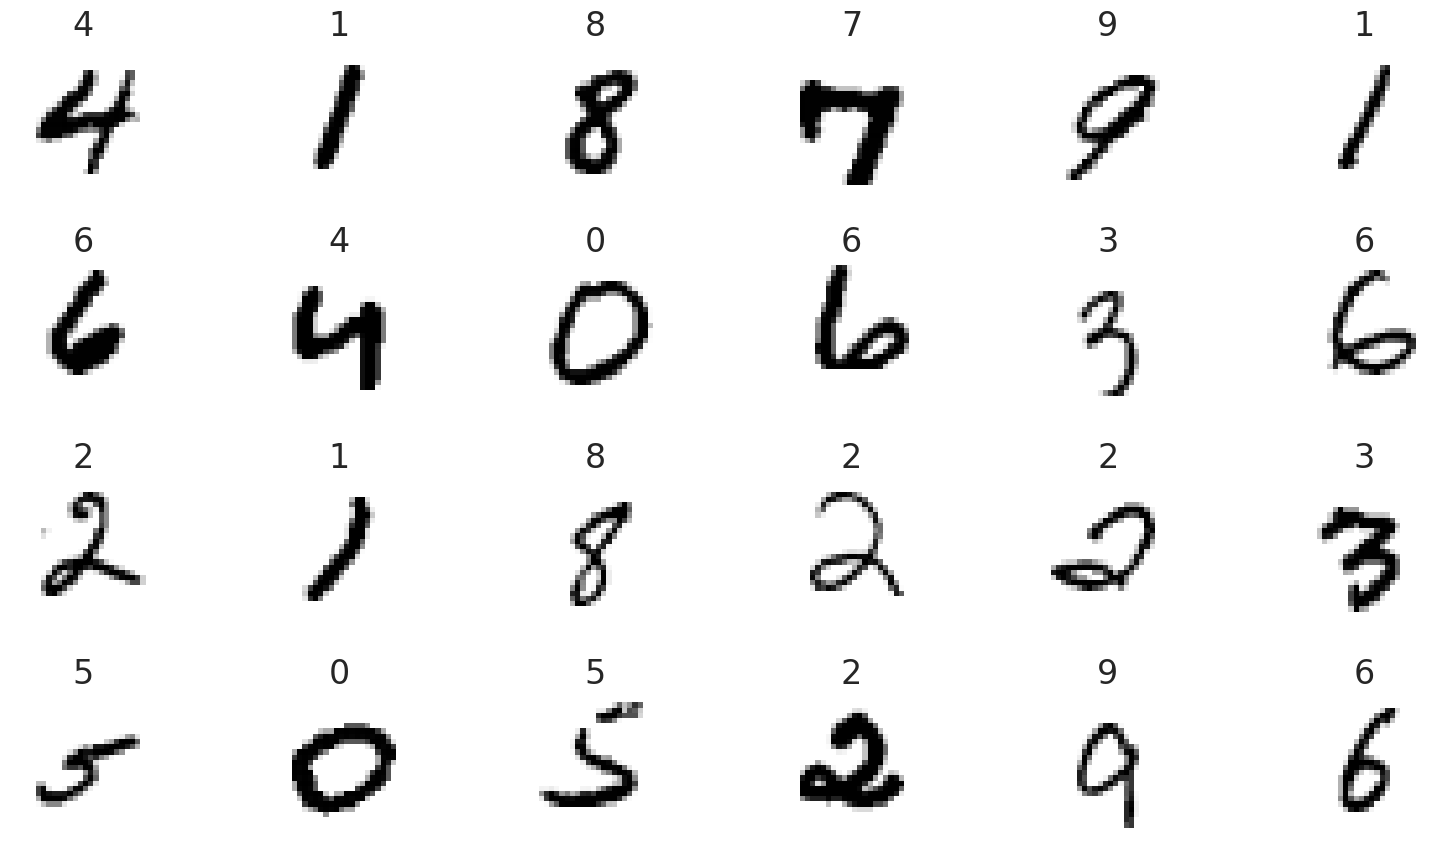

In [13]:
# Plot image
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
  axes, image, target = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(target)
plt.tight_layout()

In [14]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_train.shape

(60000, 28, 28, 1)

In [15]:
X_test = X_test.reshape((10000, 28, 28, 1))
X_test.shape

(10000, 28, 28, 1)

In [16]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [17]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape

(60000, 10)

In [18]:
y_test = to_categorical(y_test)
y_test.shape

(10000, 10)

In [19]:
from tensorflow.keras.models import Sequential
cnn = Sequential()

In [20]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [22]:
# Import libraries to compare accuracy
import time

# Load and prepare MNIST data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Create a model function with different Dense layers
def build_model(include_128=False, include_4096=False):
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())

    if include_128:
        model.add(Dense(128, activation='relu'))
    if include_4096:
        model.add(Dense(4096, activation='relu'))

    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create function to train and time model
def train_and_evaluate(name, model):
    print(f"Model: {name}")
    start = time.time()
    model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1, verbose=2)
    end = time.time()
    training_time = end - start
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Accuracy: {test_acc*100:.2f}% Training Time: {training_time:>9.2f} sec\n")
    return test_acc, training_time

# Model with first layer removed
model1 = build_model(include_128=False, include_4096=False)
acc1, time1 = train_and_evaluate("First Dense layer removed", model1)

# Model with both original layers
model2 = build_model(include_128=True, include_4096=False)
acc2, time2 = train_and_evaluate("Original layer with 2 Dense layers", model2)

# Model with original layers and new layer of 4096 neurons
model3 = build_model(include_128=True, include_4096=True)
acc3, time3 = train_and_evaluate("Added Dense layer of 4096 neurons", model3)

# Print results
print(f"Model with first Dense layer removed has accuracy: {acc1*100:.2f}% and training time: {time1:.2f} sec")
print(f"Model with original 2 Dense layers has accuracy: {acc2*100:.2f}% and training time: {time2:.2f} sec")
print(f"Model with new layer of 4096 neurons has accuracy: {acc3*100:.2f}% and training time: {time3:.2f} sec")


Model: First Dense layer removed
Epoch 1/5
844/844 - 6s - 8ms/step - accuracy: 0.9394 - loss: 0.2100 - val_accuracy: 0.9817 - val_loss: 0.0631
Epoch 2/5
844/844 - 2s - 3ms/step - accuracy: 0.9798 - loss: 0.0647 - val_accuracy: 0.9860 - val_loss: 0.0493
Epoch 3/5
844/844 - 2s - 3ms/step - accuracy: 0.9857 - loss: 0.0481 - val_accuracy: 0.9887 - val_loss: 0.0393
Epoch 4/5
844/844 - 3s - 3ms/step - accuracy: 0.9879 - loss: 0.0388 - val_accuracy: 0.9888 - val_loss: 0.0395
Epoch 5/5
844/844 - 2s - 3ms/step - accuracy: 0.9900 - loss: 0.0322 - val_accuracy: 0.9883 - val_loss: 0.0388
Accuracy: 98.71% Training Time:     17.05 sec

Model: Original layer with 2 Dense layers
Epoch 1/5
844/844 - 7s - 8ms/step - accuracy: 0.9490 - loss: 0.1710 - val_accuracy: 0.9832 - val_loss: 0.0619
Epoch 2/5
844/844 - 7s - 8ms/step - accuracy: 0.9848 - loss: 0.0498 - val_accuracy: 0.9867 - val_loss: 0.0532
Epoch 3/5
844/844 - 2s - 3ms/step - accuracy: 0.9887 - loss: 0.0352 - val_accuracy: 0.9902 - val_loss: 0.036